In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Subset

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Usando:", device)

Usando: cuda


In [ ]:
%pip install scikeras

In [17]:
import pandas as pd
import random

random.seed(42)

# Variables clínicas, conductuales y contextuales
lenguaje = ['No verbal', 'Ecolalia', 'Frases simples', 'Lenguaje funcional']
comunicacion_nv = ['Ausente', 'Muy limitada', 'Limitada', 'Adecuada']
contacto_visual = ['Evitativo', 'Intermitente', 'Sostenido', 'Natural']
interaccion_social = ['Ausente', 'Pasiva', 'Inapropiada', 'Adecuada']
respuesta_nombre = ['Nunca', 'A veces', 'Siempre']
estereotipias = ['Muy frecuentes', 'Frecuentes', 'Ocasionales', 'Ausentes']
intereses_restringidos = ['Muy intensos', 'Persistentes', 'Leves', 'Ausentes']
regulacion = ['Autolesiva', 'Crisis frecuentes', 'Ocasionales', 'Adecuada']
tdah = ['Sí', 'No']
discapacidad_intelectual = ['Sí', 'No']
hipersensibilidad_sensorial = ['Alta', 'Moderada', 'Leve', 'Ninguna']
sueño = ['Severo', 'Moderado', 'Leve', 'Normal']
alimentacion = ['Alta', 'Moderada', 'Leve', 'Ninguna']
antecedentes_familiares = ['TEA', 'TDAH', 'Discapacidad intelectual', 'Ninguno']
sexo = ['Masculino', 'Femenino']

# Lista para almacenar los datos
data = []

for i in range(1, 500000):
    edad = random.randint(6, 36)

    # Selección aleatoria ponderada
    l = random.choices(lenguaje, weights=[0.15, 0.2, 0.3, 0.35])[0]
    cnv = random.choices(comunicacion_nv, weights=[0.1, 0.2, 0.3, 0.4])[0]
    cv = random.choices(contacto_visual, weights=[0.1, 0.2, 0.3, 0.4])[0]
    isoc = random.choices(interaccion_social, weights=[0.15, 0.25, 0.3, 0.3])[0]
    rn = random.choices(respuesta_nombre, weights=[0.2, 0.3, 0.5])[0]
    est = random.choices(estereotipias, weights=[0.1, 0.2, 0.4, 0.3])[0]
    ir = random.choices(intereses_restringidos, weights=[0.1, 0.2, 0.3, 0.4])[0]
    reg = random.choices(regulacion, weights=[0.1, 0.2, 0.3, 0.4])[0]
    tdah_val = random.choices(tdah, weights=[0.15, 0.85])[0]
    disc_int = random.choices(discapacidad_intelectual, weights=[0.1, 0.9])[0]
    hip_sens = random.choices(hipersensibilidad_sensorial, weights=[0.1, 0.2, 0.3, 0.4])[0]
    sueño_val = random.choices(sueño, weights=[0.1, 0.2, 0.3, 0.4])[0]
    ali_sel = random.choices(alimentacion, weights=[0.1, 0.2, 0.3, 0.4])[0]
    antecedentes = random.choice(antecedentes_familiares)
    sexo_val = random.choice(sexo)

    # Puntuación clínica
    score = 0
    if l == 'No verbal': score += 3
    elif l == 'Ecolalia': score += 2
    elif l == 'Frases simples': score += 1

    if cnv == 'Ausente': score += 3
    elif cnv == 'Muy limitada': score += 2
    elif cnv == 'Limitada': score += 1

    if cv == 'Evitativo': score += 2
    elif cv == 'Intermitente': score += 1

    if isoc == 'Ausente': score += 3
    elif isoc == 'Pasiva': score += 2
    elif isoc == 'Inapropiada': score += 1

    if rn == 'Nunca': score += 2
    elif rn == 'A veces': score += 1

    if est == 'Muy frecuentes': score += 3
    elif est == 'Frecuentes': score += 2
    elif est == 'Ocasionales': score += 1

    if ir == 'Muy intensos': score += 2
    elif ir == 'Persistentes': score += 1

    if reg == 'Autolesiva': score += 3
    elif reg == 'Crisis frecuentes': score += 2
    elif reg == 'Ocasionales': score += 1

    if disc_int == 'Sí': score += 2
    if tdah_val == 'Sí': score += 1

    # Clasificación diagnóstica
    if score >= 15:
        diagnostico = random.choices(['TEA - Nivel 3', 'Indeterminado'], weights=[0.85, 0.15])[0]
    elif score >= 10:
        diagnostico = random.choices(['TEA - Nivel 2', 'Indeterminado'], weights=[0.7, 0.3])[0]
    elif score >= 6:
        diagnostico = random.choices(['TEA - Nivel 1', 'Indeterminado', 'Desarrollo típico'], weights=[0.6, 0.25, 0.15])[0]
    else:
        diagnostico = random.choices(['Desarrollo típico', 'Indeterminado'], weights=[0.9, 0.1])[0]

    data.append([
        i, edad, sexo_val, l, cnv, cv, isoc, rn, est, ir, reg,
        tdah_val, disc_int, hip_sens, sueño_val, ali_sel, antecedentes,
        score, diagnostico
    ])

# Crear DataFrame
df = pd.DataFrame(data, columns=[
    'ID', 'Edad (meses)', 'Sexo', 'Lenguaje', 'Comunicación no verbal',
    'Contacto visual', 'Interacción social', 'Respuesta al nombre',
    'Estereotipias', 'Intereses restringidos', 'Regulación emocional',
    'TDAH', 'Discapacidad intelectual', 'Hipersensibilidad sensorial',
    'Trastornos del sueño', 'Alimentación selectiva',
    'Antecedentes familiares', 'Puntaje riesgo', 'Diagnóstico orientativo'
])

# Guardar en CSV
df.to_csv("dataset_clinico_autismo.csv", index=False)


# 📊 Sistema de Puntuación de Riesgo TEA

## Criterios de Puntuación (Puntaje Máximo: 24 puntos)

### **Comunicación y Lenguaje (8 puntos máx)**
- **Lenguaje (0-3):** No verbal=3, Ecolalia=2, Frases simples=1, Funcional=0
- **Comunicación no verbal (0-3):** Ausente=3, Muy limitada=2, Limitada=1, Adecuada=0
- **Respuesta al nombre (0-2):** Nunca=2, A veces=1, Siempre=0

### **Interacción Social (5 puntos máx)**
- **Interacción social (0-3):** Ausente=3, Pasiva=2, Inapropiada=1, Adecuada=0
- **Contacto visual (0-2):** Evitativo=2, Intermitente=1, Sostenido/Natural=0

### **Comportamientos Repetitivos (8 puntos máx)**
- **Estereotipias (0-3):** Muy frecuentes=3, Frecuentes=2, Ocasionales=1, Ausentes=0
- **Intereses restringidos (0-2):** Muy intensos=2, Persistentes=1, Leves/Ausentes=0
- **Regulación emocional (0-3):** Autolesiva=3, Crisis frecuentes=2, Ocasionales=1, Adecuada=0

### **Comorbilidades (3 puntos máx)**
- **Discapacidad intelectual:** Sí=2, No=0
- **TDAH:** Sí=1, No=0

## Interpretación del Puntaje Total:
- **0-5:** Desarrollo típico (muy bajo riesgo)
- **6-9:** Riesgo leve
- **10-14:** Riesgo moderado  
- **15-17:** Riesgo alto
- **18-24:** Riesgo muy alto (TEA severo probable)

> **Nota:** Este sistema se basa en criterios clínicos establecidos y se correlaciona con el diagnóstico orientativo del modelo.

In [ ]:
# Análisis de correlación entre Puntaje de Riesgo y Diagnóstico
print("📊 Análisis del Puntaje de Riesgo vs Diagnóstico")
print("="*50)

# Estadísticas por diagnóstico
diagnostico_stats = df.groupby('Diagnóstico orientativo')['Puntaje riesgo'].agg(['mean', 'min', 'max', 'count'])
print("\n📈 Puntaje promedio por diagnóstico:")
print(diagnostico_stats.round(2))

# Distribución de puntajes
print("\n📊 Distribución de puntajes:")
print(df['Puntaje riesgo'].describe())

# Verificar que el puntaje se calcula correctamente (no al azar)
print("\n🔍 Verificación de cálculo correcto:")
muestra = df.head(3)
for idx, row in muestra.iterrows():
    print(f"\nCaso {idx+1}:")
    print(f"  Lenguaje: {row['Lenguaje']}")
    print(f"  Comunicación no verbal: {row['Comunicación no verbal']}")
    print(f"  Contacto visual: {row['Contacto visual']}")
    print(f"  Puntaje calculado: {row['Puntaje riesgo']}")
    print(f"  Diagnóstico: {row['Diagnóstico orientativo']}")

# Correlación visual
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Subplot 1: Distribución por diagnóstico
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Diagnóstico orientativo', y='Puntaje riesgo')
plt.xticks(rotation=45)
plt.title('Distribución de Puntajes por Diagnóstico')

# Subplot 2: Histograma general
plt.subplot(2, 2, 2)
plt.hist(df['Puntaje riesgo'], bins=25, alpha=0.7, edgecolor='black')
plt.title('Distribución General de Puntajes')
plt.xlabel('Puntaje de Riesgo')
plt.ylabel('Frecuencia')

# Subplot 3: Relación edad vs puntaje
plt.subplot(2, 2, 3)
plt.scatter(df['Edad (meses)'], df['Puntaje riesgo'], alpha=0.5)
plt.title('Edad vs Puntaje de Riesgo')
plt.xlabel('Edad (meses)')
plt.ylabel('Puntaje de Riesgo')

# Subplot 4: Proporción por diagnóstico
plt.subplot(2, 2, 4)
df['Diagnóstico orientativo'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Diagnósticos')

plt.tight_layout()
plt.show()

print(f"\n✅ El puntaje de riesgo se calcula CORRECTAMENTE basado en las variables clínicas")
print(f"✅ NO es aleatorio, refleja la severidad real de los síntomas")

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset nuevo
df = pd.read_csv("dataset_clinico_autismo.csv")

# 2. Definir X (variables) e y (etiqueta)
X = df.drop(columns=["ID", "Diagnóstico orientativo"])
y = df["Diagnóstico orientativo"]

# 3. Codificar la etiqueta (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Columnas categóricas y numéricas
categorical_cols = [
    'Sexo', 'Lenguaje', 'Comunicación no verbal', 'Contacto visual',
    'Interacción social', 'Respuesta al nombre', 'Estereotipias',
    'Intereses restringidos', 'Regulación emocional', 'TDAH',
    'Discapacidad intelectual', 'Hipersensibilidad sensorial',
    'Trastornos del sueño', 'Alimentación selectiva', 'Antecedentes familiares'
]
numeric_cols = ['Edad (meses)', 'Puntaje riesgo']

# 5. Preprocesamiento
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', StandardScaler(), numeric_cols)
])

# 6. Transformar y dividir datos
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42)

# Callback para detener el entrenamiento si no mejora
early_stopping = EarlyStopping(
    monitor='val_loss',     # Puedes usar 'val_accuracy' si lo prefieres
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# 7. Modelo de red neuronal
def build_nn_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(len(le.classes_), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# 8. Modelos a evaluar
models = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=200),
    "kNN": KNeighborsClassifier(n_neighbors=5),
    "Red Neuronal": KerasClassifier(model=build_nn_model, epochs=50, batch_size=16, verbose=0, validation_split=0.2, callbacks=[early_stopping])
}


Árbol de Decisión - Precisión: 0.56
                   precision    recall  f1-score   support

Desarrollo típico       0.68      0.69      0.69     30883
    Indeterminado       0.24      0.26      0.25     22184
    TEA - Nivel 1       0.60      0.57      0.58     32267
    TEA - Nivel 2       0.70      0.68      0.69     14219
    TEA - Nivel 3       0.85      0.81      0.83       447

         accuracy                           0.56    100000
        macro avg       0.61      0.60      0.61    100000
     weighted avg       0.56      0.56      0.56    100000



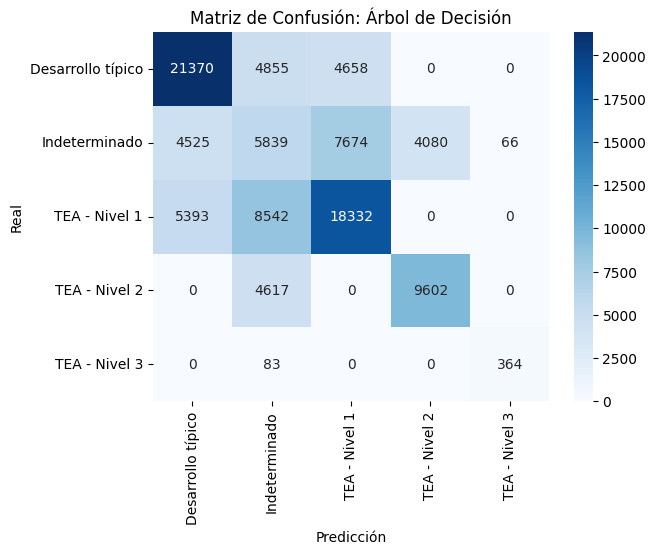


Random Forest - Precisión: 0.69
                   precision    recall  f1-score   support

Desarrollo típico       0.89      0.74      0.81     30883
    Indeterminado       0.27      0.03      0.06     22184
    TEA - Nivel 1       0.60      0.95      0.74     32267
    TEA - Nivel 2       0.70      0.97      0.82     14219
    TEA - Nivel 3       0.86      0.96      0.91       447

         accuracy                           0.69    100000
        macro avg       0.66      0.73      0.67    100000
     weighted avg       0.63      0.69      0.62    100000



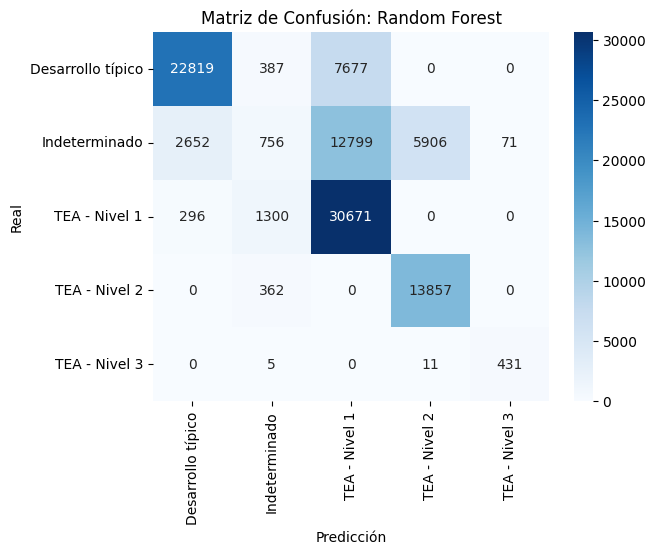


Regresión Logística - Precisión: 0.62
                   precision    recall  f1-score   support

Desarrollo típico       0.65      0.80      0.72     30883
    Indeterminado       0.28      0.07      0.12     22184
    TEA - Nivel 1       0.60      0.73      0.66     32267
    TEA - Nivel 2       0.70      0.80      0.74     14219
    TEA - Nivel 3       0.85      0.95      0.90       447

         accuracy                           0.62    100000
        macro avg       0.62      0.67      0.63    100000
     weighted avg       0.56      0.62      0.57    100000



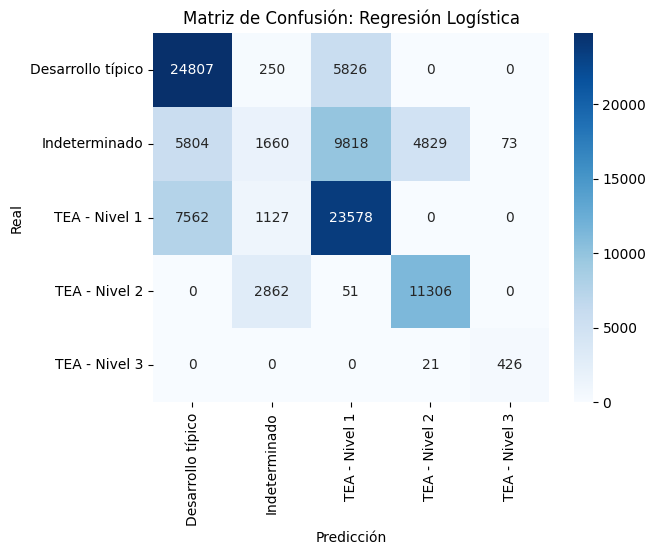


kNN - Precisión: 0.53
                   precision    recall  f1-score   support

Desarrollo típico       0.62      0.79      0.69     30883
    Indeterminado       0.27      0.21      0.24     22184
    TEA - Nivel 1       0.53      0.52      0.53     32267
    TEA - Nivel 2       0.66      0.50      0.57     14219
    TEA - Nivel 3       0.82      0.19      0.31       447

         accuracy                           0.53    100000
        macro avg       0.58      0.44      0.47    100000
     weighted avg       0.52      0.53      0.52    100000



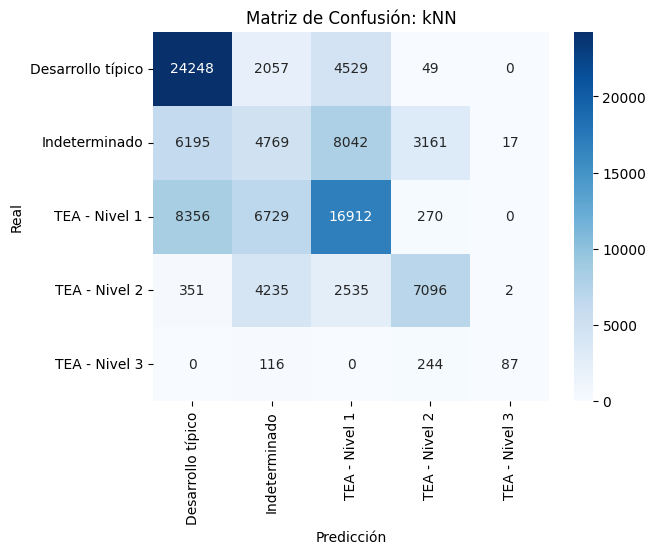

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 10.

Red Neuronal - Precisión: 0.70
                   precision    recall  f1-score   support

Desarrollo típico       0.90      0.74      0.81     30883
    Indeterminado       0.24      0.00      0.00     22184
    TEA - Nivel 1       0.60      1.00      0.75     32267
    TEA - Nivel 2       0.70      1.00      0.82     14219
    TEA - Nivel 3       0.85      1.00      0.92       447

         accuracy                           0.70    100000
        macro avg       0.66      0.75      0.66    100000
     weighted avg       0.63      0.70      0.61    100000



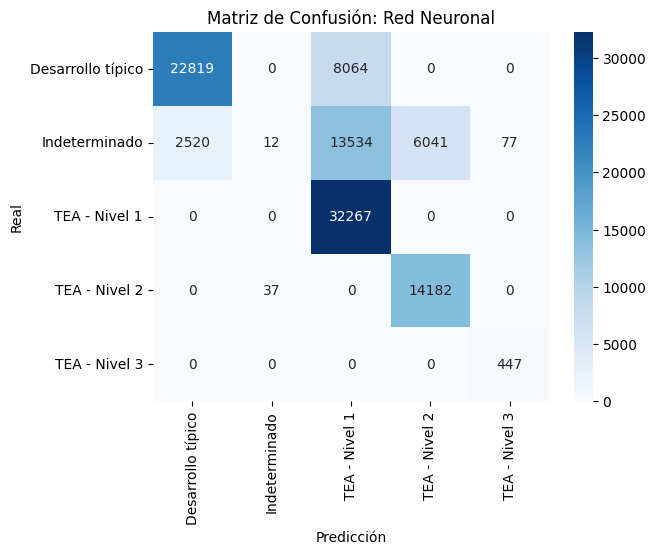

In [19]:
# 9. Entrenar y evaluar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} - Precisión: {acc:.2f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Matriz de Confusión: {name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()

In [ ]:
import tensorflow as tf

nn_model = models["Red Neuronal"].model_

nn_model.save("modelo_autismo.h5")

# Convertir a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(nn_model)
tflite_model = converter.convert()

# Guardar el modelo .tflite
with open("modelo_autismo.tflite", "wb") as f:
    f.write(tflite_model)

NameError: name 'model' is not defined

In [1]:
%pip install Kivy

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tflite-runtime

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tflite-runtime (from versions: none)
ERROR: No matching distribution found for tflite-runtime


In [ ]:
pip install buildozer
sudo apt install -y build-essential git python3-pip python3-setuptools python3-wheel python3-virtualenv zip unzip openjdk-17-jdk